<a href="https://colab.research.google.com/github/cloud-vinny/Computing_Tech_Proj_Assignment/blob/main/Spam1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset_spam/2spam/emails.csv")
print(df.shape)

(5728, 2)


**Data Cleaning**

In [ ]:
#lowercase all the chars
df.text = df.text.str.lower()

In [ ]:
# Clear and repeated word : "subject: " , "re :" , "fw :" , and "news :" .
df['text'] = df['text'].str.replace("subject: ", "", regex=True)
df['text'] = df['text'].str.replace("re : ", "", regex=True)
df['text'] = df['text'].str.replace("fw : ", "", regex=True)
df['text'] = df['text'].str.replace("news : ", "", regex=True)

df.sample(10)

,text,spam
1103,"our goood medz hello , welcome to pharm urina...",1
4911,"merry christmas dear mr . kaminski , in the ...",0
2787,iafe membership dear colleague : we are plea...,0
3940,this summer ' s houston visits richard has ag...,0
1125,we will guide you thru all of the answers to y...,1
5335,"lsu seminar visit vince , please send a pack...",0
3918,"thanks a lot . dr . kaminski , i appreciate ...",0
187,mid summer flag special : free shipping armst...,1
2996,"congratulations vince , congratulations to y...",0
2343,"resume , cv . , etc . dear mr . kaminski : a...",0


In [ ]:
#checking if there's any missing value of both column
df.isnull().sum()

,0
text,0
spam,0


In [ ]:
#checking if there's any duplicate in text column
df["text"].duplicated().sum()

np.int64(33)

In [ ]:
# Remove the duplicate and keep the first one
df = df.drop_duplicates(keep="first")

In [ ]:
# Checking the duplicated if it's removed
df.duplicated().sum()

np.int64(0)

**Exploratory Data Analysis**

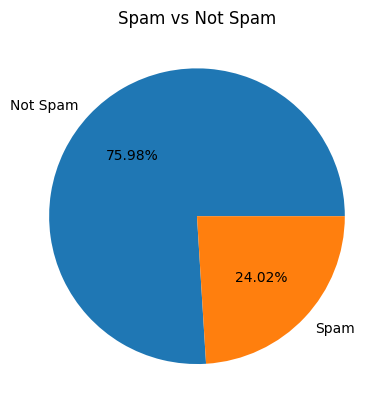

In [ ]:
counts = df['spam'].value_counts()
label_map = {1: 'Spam', 0: 'Not Spam'}
labels = [label_map[i] for i in counts.index]

plt.pie(counts,labels=labels,autopct='%0.2f%%')
plt.title('Spam vs Not Spam')
plt.show()
# result shows of imbalance df between not spam and spam

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Tokenization
df['num_chars']=df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sen10'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,text,spam,num_chars,num_words,num_sen10
0,naturally irresistible your corporate identity...,1,1475,323,11
1,the stock trading gunslinger fanny is merrill...,1,589,88,1
2,unbelievable new homes made easy im wanting t...,1,439,86,4
3,4 color printing special request additional i...,1,491,97,5
4,"do not have money , get software cds from here...",1,226,51,9


In [ ]:
df[['num_chars', 'num_words', 'num_sen10']].describe()

,num_chars,num_words,num_sen10
count,5695.000000,5695.000000,5695.000000
mean,1545.613345,324.859526,19.462511
std,2045.344205,418.840927,35.981993
min,4.000000,1.000000,1.000000
25%,498.000000,100.000000,7.000000
50%,969.000000,208.000000,12.000000
75%,1881.500000,399.000000,22.000000
max,43928.000000,8471.000000,1565.000000


In [ ]:
# Not Spam
df[df['spam'] == 0 ][['num_chars', 'num_words', 'num_sen10']].describe()

,num_chars,num_words,num_sen10
count,4327.000000,4327.000000,4327.000000
mean,1620.858100,343.568061,19.838225
std,1962.893756,406.232618,38.124564
min,4.000000,1.000000,1.000000
25%,566.000000,117.000000,7.000000
50%,1110.000000,237.000000,13.000000
75%,2024.000000,436.500000,22.000000
max,43928.000000,8471.000000,1565.000000


In [ ]:
# Spam
df[df['spam'] == 1 ][['num_chars', 'num_words', 'num_sen10']].describe()

,num_chars,num_words,num_sen10
count,1368.000000,1368.000000,1368.000000
mean,1307.613304,265.684211,18.274123
std,2271.062450,451.513524,28.130434
min,9.000000,3.000000,1.000000
25%,391.750000,78.000000,6.000000
50%,682.500000,139.000000,11.000000
75%,1241.250000,250.000000,18.000000
max,28418.000000,6128.000000,438.000000


<Axes: xlabel='num_chars', ylabel='Count'>

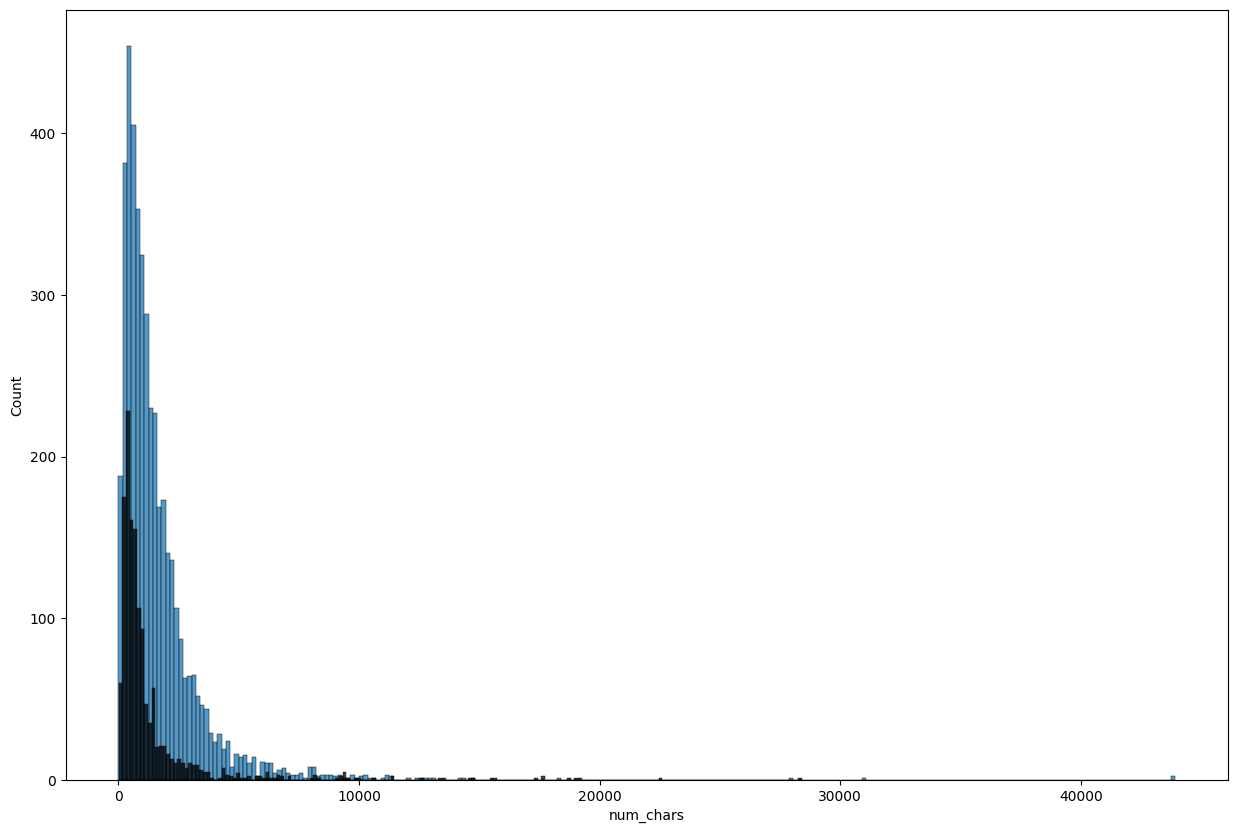

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(df[df['spam'] == 0]['num_chars'])
sns.histplot(df[df['spam'] == 1]['num_chars'], color="black")

<Axes: xlabel='num_chars', ylabel='Count'>

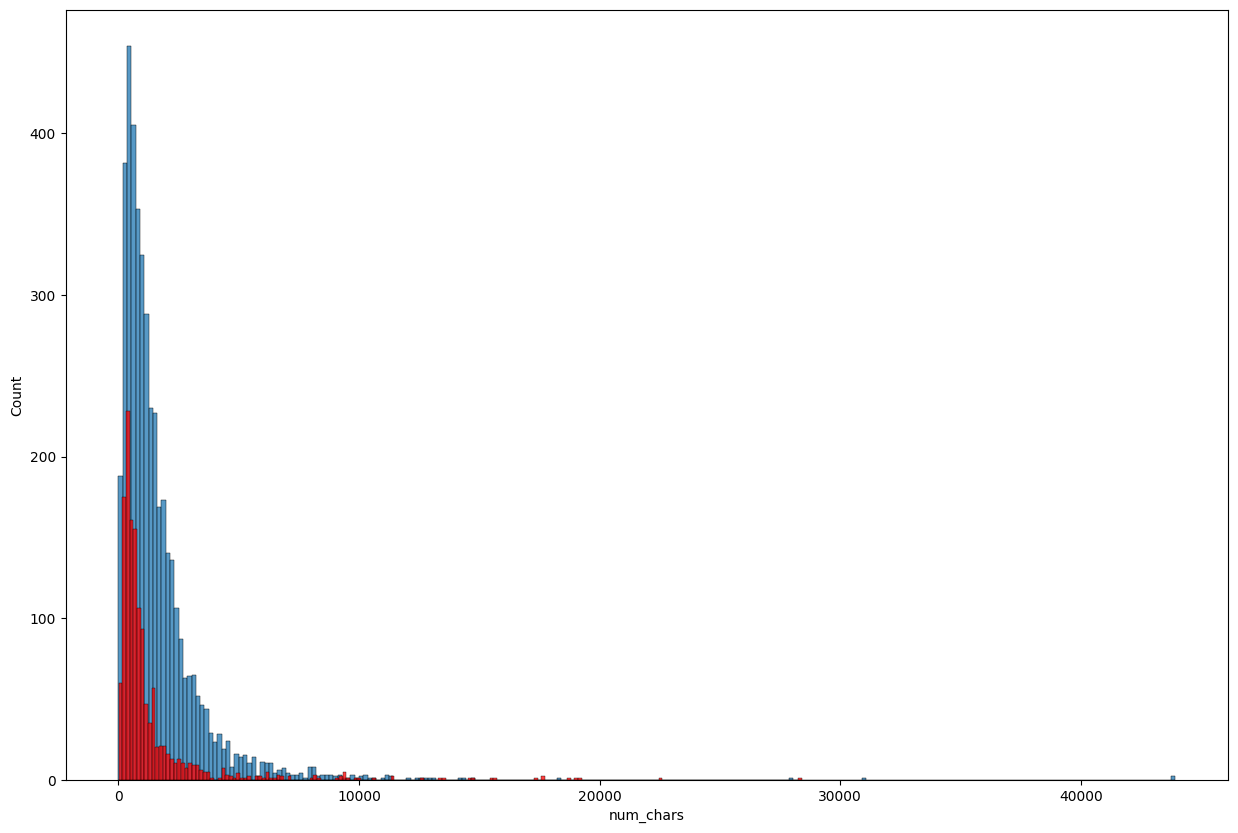

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(df[df['spam'] == 0]['num_chars'])
sns.histplot(df[df['spam'] == 1]['num_chars'], color="red")

<Axes: xlabel='num_sen10', ylabel='Count'>

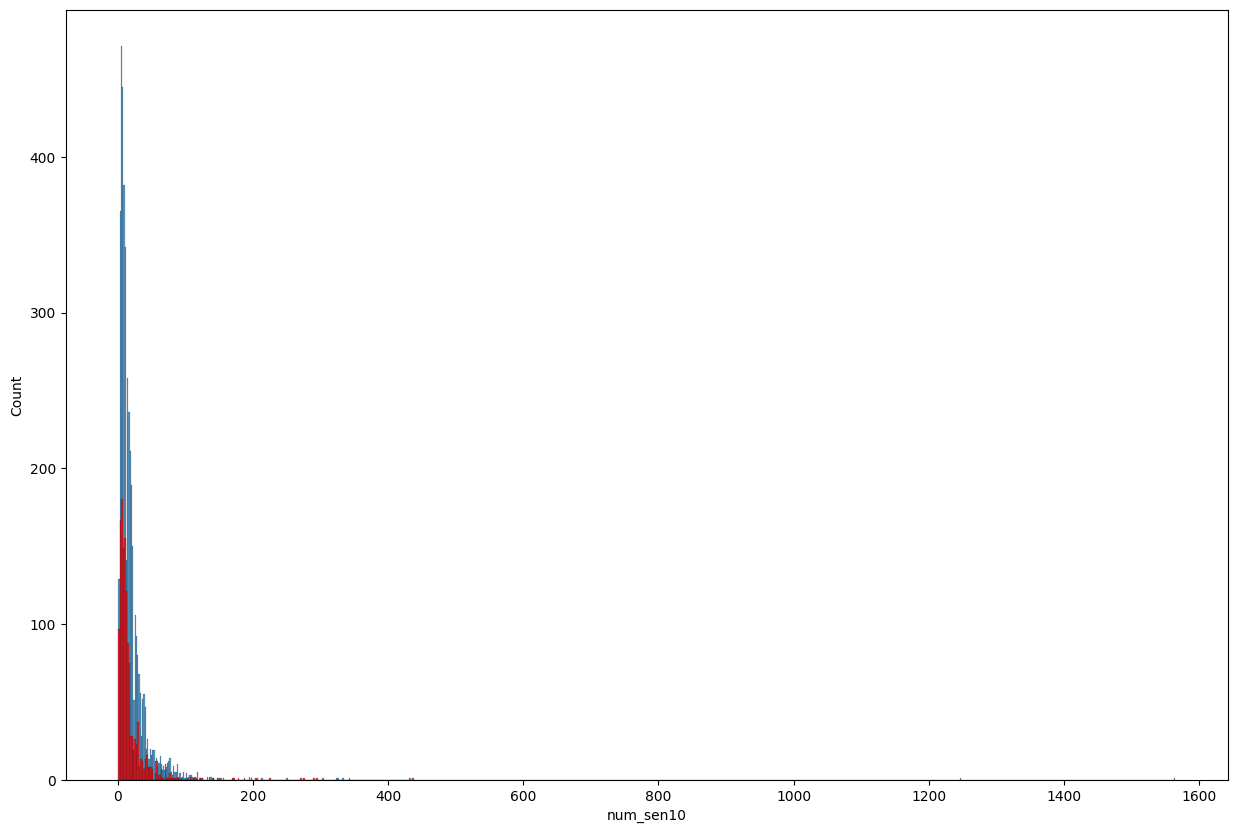

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(df[df['spam'] == 0]['num_sen10'])
sns.histplot(df[df['spam'] == 1]['num_sen10'], color="red")

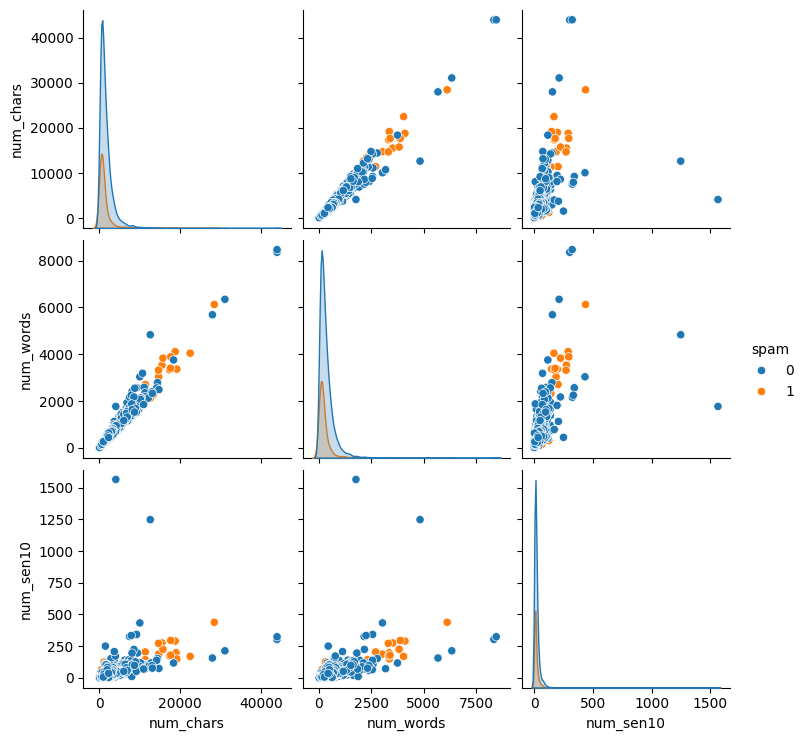

In [ ]:
sns.pairplot(df,hue='spam')

In [ ]:
# Correlation
corr = df.select_dtypes(include=['number']).corr()
print(corr)

               spam  num_chars  num_words  num_sen10
spam       1.000000  -0.065433  -0.079447  -0.018572
num_chars -0.065433   1.000000   0.986137   0.595649
num_words -0.079447   0.986137   1.000000   0.660499
num_sen10 -0.018572   0.595649   0.660499   1.000000


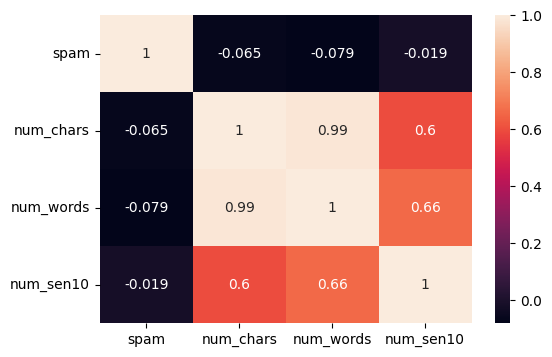

In [ ]:
# Heat Map
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True)
plt.show()

**Data Preprocessing**


In [ ]:
nltk.download('stopwords')
import string
string.punctuation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.stem.porter import PorterStemmer
#Stemming method
ps = PorterStemmer()
ps.stem('cooking')

'cook'

In [ ]:
def text_transform(text):
  text = text.lower() #lowercase
  text = nltk.word_tokenize(text) #tokenize

  # remove special chars & stopwords & punctuation & stemming
  b = []
  for a in text:
    if a.isalnum() and a not in stopwords.words('english') and a not in string.punctuation:
      b.append(ps.stem(a))

  return " ".join(b)

In [ ]:
text = df['text'][500]
# text = "I loved to play basketball and watching anime. How about you? bro"
text_transform(text)

'look good team softwar engin looklng good lt team mani reason hire profession lt team lf qot activ line busi dissatisfi guaiiti currentsupport cost lf busi expand ionq professionai support team lf specif softwar requir iik soiution custom toqetherwith warranti reiiabi support perfect busi idea want make realiti project stall due lack addit resourc need independ team benchmark optim qualiti assur look truli profession team servic visit websit interest'

In [ ]:
df["preprocessed_text"] = df['text'].apply(text_transform)
df.head(10)

,text,spam,num_chars,num_words,num_sen10,preprocessed_text
0,naturally irresistible your corporate identity...,1,1475,323,11,natur irresist corpor ident lt realli hard rec...
1,the stock trading gunslinger fanny is merrill...,1,589,88,1,stock trade gunsling fanni merril muzo colza a...
2,unbelievable new homes made easy im wanting t...,1,439,86,4,unbeliev new home made easi im want show homeo...
3,4 color printing special request additional i...,1,491,97,5,4 color print special request addit inform cli...
4,"do not have money , get software cds from here...",1,226,51,9,money get softwar cd softwar compat great grow...
5,"great nnews hello , welcome to medzonline sh ...",1,469,83,3,great nnew hello welcom medzonlin sh groundsel...
6,here ' s a hot play in motion homeland securi...,1,9331,1702,72,hot play motion homeland secur invest terror a...
7,save your money buy getting this thing here y...,1,437,95,9,save money buy get thing tri ciall yet even im...
8,undeliverable : home based business for grownu...,1,498,120,3,undeliver home base busi grownup messag subjec...
9,save your money buy getting this thing here y...,1,437,95,9,save money buy get thing tri ciall yet even im...


In [ ]:
#save the current dataset
df.to_csv("/content/drive/MyDrive/Colab Notebooks/dataset_spam/2spam/preprocessed_dataset.csv")

In [ ]:
from wordcloud import WordCloud

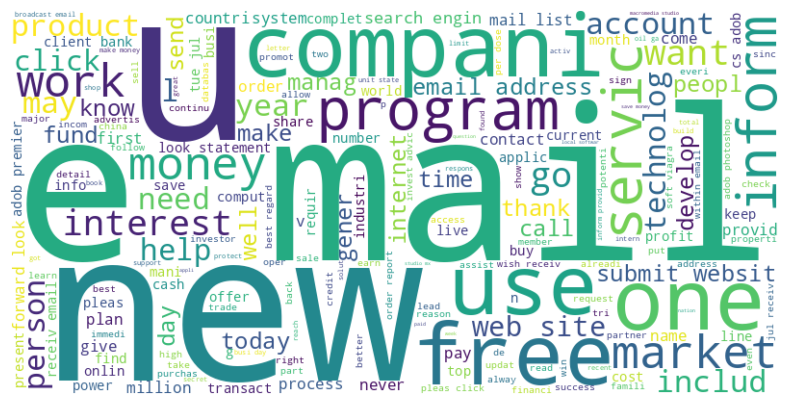

In [ ]:
# Generate word cloud only for spam messages
wc = WordCloud(width=800, height=400, background_color='white')
spam_wc = wc.generate(df[df['spam'] == 1]['preprocessed_text'].str.cat(sep=" "))

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

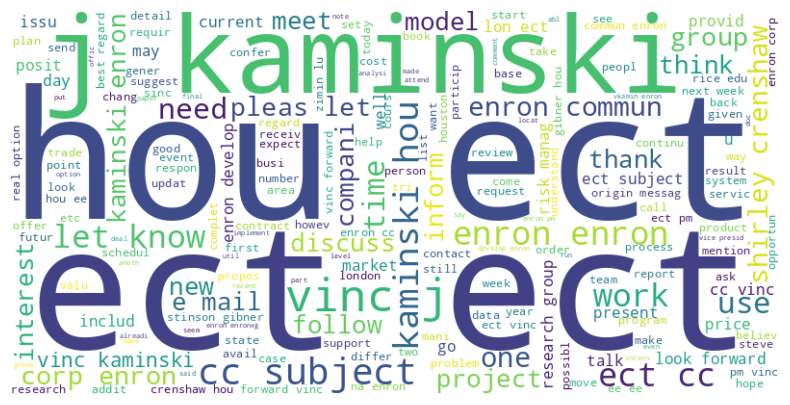

In [ ]:
# Generate word cloud only for non spam messages
non_spam_wc = wc.generate(df[df['spam'] == 0]['preprocessed_text'].str.cat(sep=" "))

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
spam_corpus = []
for msg in df[df['spam'] == 1]['preprocessed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)
len(spam_corpus)

173242

In [ ]:
pd.DataFrame(Counter(spam_corpus).most_common(50))

,0,1
0,compani,1065
1,com,1000
2,1,952
3,mail,917
4,busi,897
5,email,865
6,inform,818
7,receiv,727
8,e,701
9,get,694


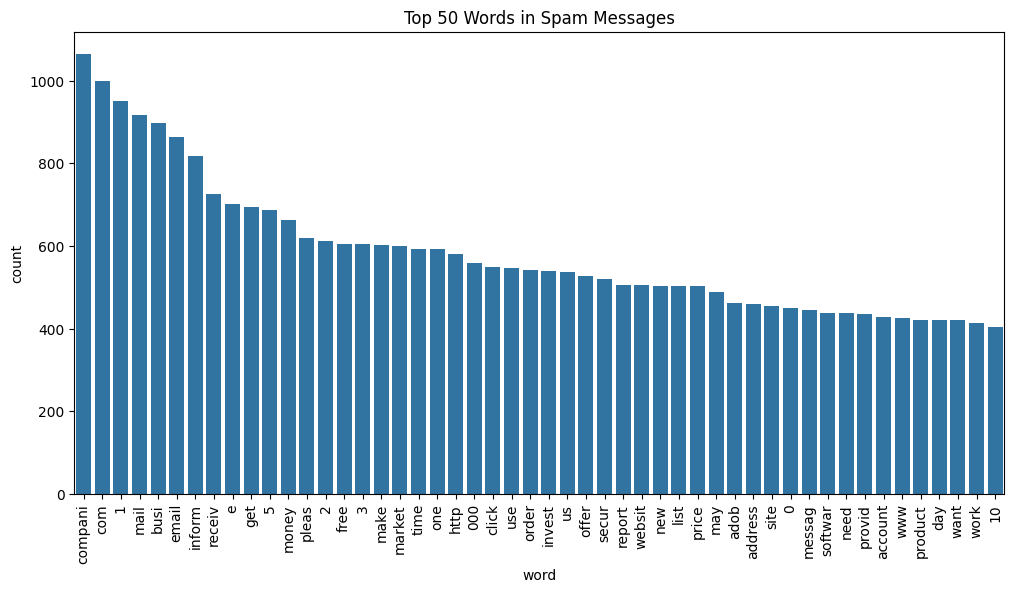

In [ ]:
spam_word_counts = Counter(spam_corpus).most_common(50)
df_swc = pd.DataFrame(spam_word_counts, columns=['word', 'count'])

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='word', y='count', data=df_swc)
plt.xticks(rotation='vertical')
plt.title("Top 50 Words in Spam Messages")
plt.show()

In [ ]:
non_spam_corpus = []
for msg in df[df['spam'] == 0]['preprocessed_text'].tolist():
  for word in msg.split():
    non_spam_corpus.append(word)
len(non_spam_corpus)

698430

In [ ]:
Counter(non_spam_corpus).most_common(50)

[('enron', 13335),
 ('ect', 11410),
 ('vinc', 8468),
 ('hou', 5567),
 ('2000', 4932),
 ('kaminski', 4754),
 ('pleas', 4440),
 ('com', 4397),
 ('subject', 4238),
 ('would', 4124),
 ('cc', 3862),
 ('j', 3669),
 ('thank', 3537),
 ('pm', 3247),
 ('2001', 3021),
 ('forward', 2943),
 ('research', 2713),
 ('time', 2534),
 ('meet', 2520),
 ('1', 2469),
 ('group', 2451),
 ('know', 2329),
 ('manag', 2326),
 ('2', 2295),
 ('work', 2265),
 ('10', 2206),
 ('price', 2164),
 ('model', 2153),
 ('market', 2134),
 ('energi', 2112),
 ('risk', 2092),
 ('like', 1962),
 ('power', 1961),
 ('may', 1956),
 ('need', 1882),
 ('inform', 1865),
 ('regard', 1847),
 ('let', 1844),
 ('3', 1821),
 ('use', 1773),
 ('new', 1765),
 ('get', 1751),
 ('develop', 1683),
 ('shirley', 1682),
 ('00', 1671),
 ('01', 1665),
 ('11', 1656),
 ('corp', 1642),
 ('look', 1594),
 ('also', 1593)]

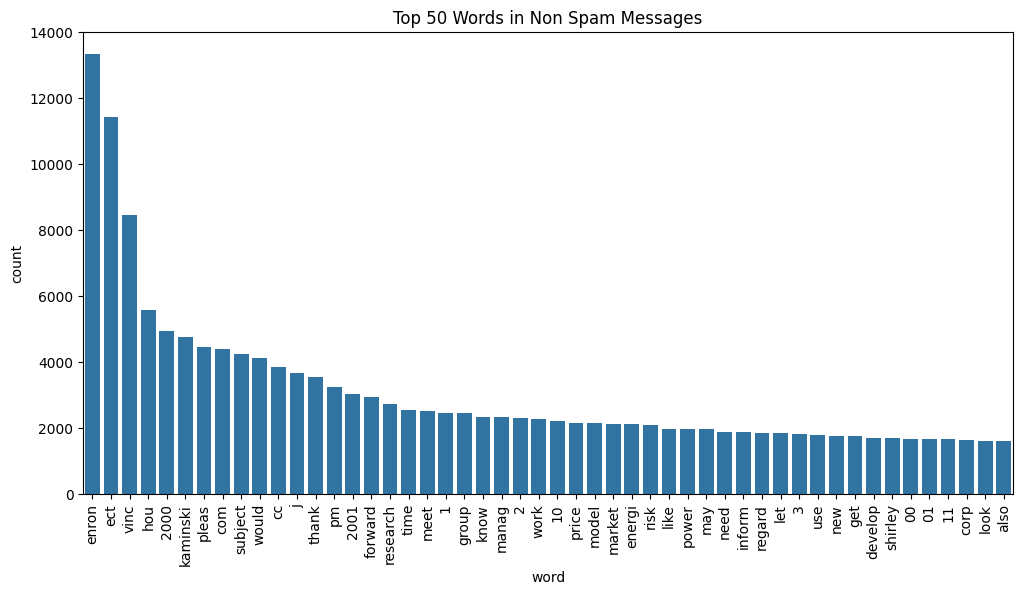

In [ ]:
n_spam_word_counts = Counter(non_spam_corpus).most_common(50)
df_nswc = pd.DataFrame(n_spam_word_counts, columns=['word', 'count'])

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='word', y='count', data=df_nswc)
plt.xticks(rotation='vertical')
plt.title("Top 50 Words in Non Spam Messages")
plt.show()

**Model Building**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score

In [ ]:
cv = CountVectorizer()
X = cv.fit_transform(df['preprocessed_text']).toarray()

# tfidf = TfidfVectorizer()
# X = tfidf.fit_transform(df['preprocessed_text']).toarray()

In [ ]:
X.shape

(5695, 29264)

In [ ]:
y = df['spam'].values
y

array([1, 1, 1, ..., 0, 0, 0])

***Spliting Train = 80% and Test = 20%***

In [ ]:
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.2, random_state=2)

***Train***

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print("Accuracy_score: ")
print(accuracy_score(y_test,y_pred1))
print("Confusion_matrix: ")
print(confusion_matrix(y_test,y_pred1))
print("Precision_score: ")
print(precision_score(y_test,y_pred1))

Accuracy_score: 
0.9490781387181738
Confusion_matrix: 
[[836  13]
 [ 45 245]]
Precision_score: 
0.9496124031007752


In [ ]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print("accuracy_score: ")
print(accuracy_score(y_test,y_pred2))
print("confusion_matrix: ")
print(confusion_matrix(y_test,y_pred2))
print("precision_score: ")
print(precision_score(y_test,y_pred2))

accuracy_score: 
0.8805970149253731
confusion_matrix: 
[[847   2]
 [134 156]]
precision_score: 
0.9873417721518988


In [ ]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print("accuracy_score: ")
print(accuracy_score(y_test,y_pred3))
print("confusion_matrix: ")
print(confusion_matrix(y_test,y_pred3))
print("precision_score: ")
print(precision_score(y_test,y_pred3))

accuracy_score: 
0.9894644424934153
confusion_matrix: 
[[845   4]
 [  8 282]]
precision_score: 
0.986013986013986


***TESTING PREDICTION***

In [ ]:
num = 1020
mess = df['text'][num]
print(f'Message: "{mess}"')

# Apply your preprocessing
mess = text_transform(mess)

# Convert to vector (same as training!)
mess_vec = cv.transform([mess])

#actual
actual = df['spam'][num]
if actual == 1:
  print("Actual: SPAM " )
else:
  print("Prediction: NON SPAM ")


# Predict
y_pred3 = bnb.predict(mess_vec)

if y_pred3 == 1:
  print("Prediction: SPAM " )
else:
  print("Prediction: NON SPAM ")


Message: "award winning notification  netherlands national promotion .  dayzers prime lottery  venlo the netherlands .  www . dayzers . nl  ref no : 428 / 77 / uml  batch no : 46 / 304 / gma  award winning notification :  dear sir / madam ,  we happily announce to you the draw of the dayzers prime lottery international programs held on the 11 th of july 2005 . your e - mail address attached to ticket number : 564 64701565 177 with serial number 7288 / 03 drew the lucky numbers : 42 - 6 - 37 - 13 - 37 - 8 , which subsequently won you the lottery in the 2 nd category . you have therefore been approved to claim a total sum of ( $ 1 , 000 , 000 . 00 ) one million united states dollars .  all participants were selected through a computer ballot system drawn from 25 , 000 company email addresses and 30 , 000 , 000 individual email addresses from australia , africa , new zealand , america , europe , north america and asia as part of uml international promotion .  congratulations ! ! ! due to 